# Instructions
1. Use intrasm_engine/benchmark/setup_sgk_dlmc.sh [SGK deep learning matrix collection](https://storage.googleapis.com/sgk-sc2020/dlmc.tar.gz) to set up the data at intrasm_engine/data/sgk_dlmc/dlmc
2. Use intrasm_engine/benchmark/utils.py \_\_main\_\_ to convert DLMC SMTX files to MTX files.

Use intrasm_engine/benchmark/setup_sksparse_data.sh [SKSparse test data](https://github.com/scikit-sparse/scikit-sparse) to set up the data at intrasm_engine/data/sksparse

# Configurations

In [1]:
import os
import scipy.io
from scipy import sparse
import matplotlib.pyplot as plt

In [2]:
import intrasm_engine

Print handle to force cublas initialization (otherwise first matmul captured in the graph may fail): 155108160
Setting float16 and bf16 using reduced precision in reduction


# Bandwidth Reducing Examples
Another candidate is [pymetis](https://github.com/inducer/pymetis?tab=readme-ov-file) works on adjacency list. For simplicity we didn't implement an example here.
Another candidate is [amd by cvxopt](https://cvxopt.org/userguide/spsolvers.html). We didn't implement an example here, either.

## `scipy` Reverse Cuthill Mckee 

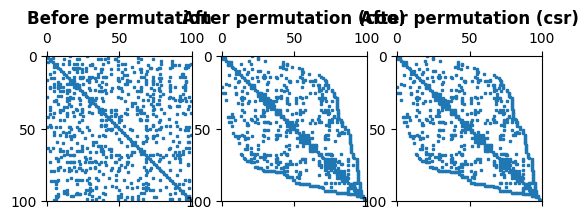

In [3]:
from benchmark import utils_bandwidth_reducing
utils_bandwidth_reducing.reverse_chthill_mckee_example()

## `sksparse` Cholmod

/home/kwu/cupy-playground/intrasm_engine/benchmark/bandwidth_reducing_examples.py:149: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  answer = np.linalg.lstsq(X.todense(), y)[0]
/home/kwu/cupy-playground/intrasm_engine/benchmark/bandwidth_reducing_examples.py:157: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky_AAt(X.T, mode=mode)


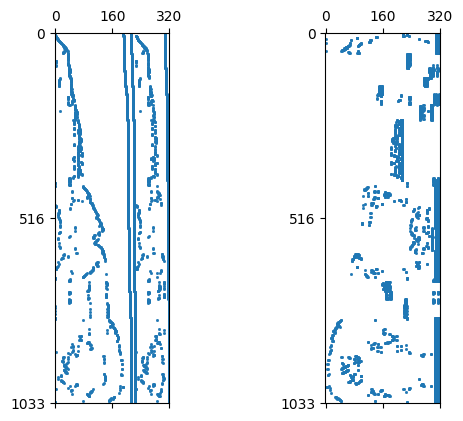

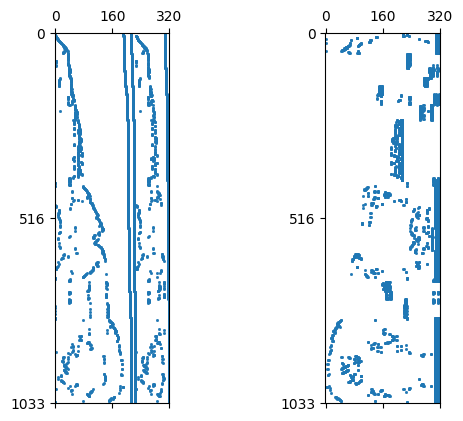

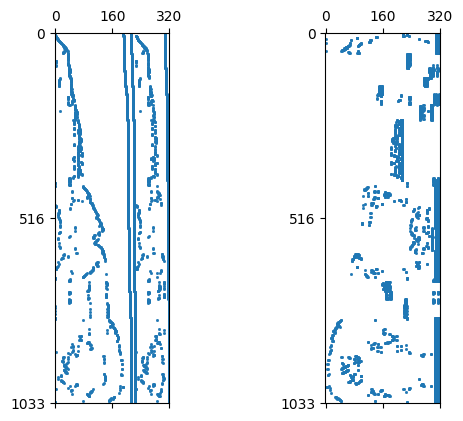

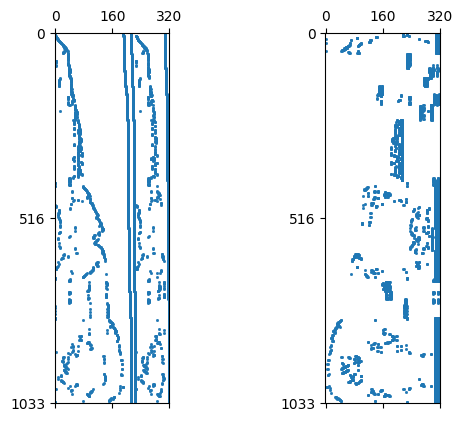

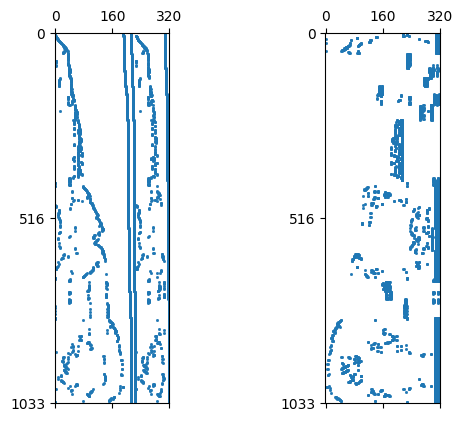

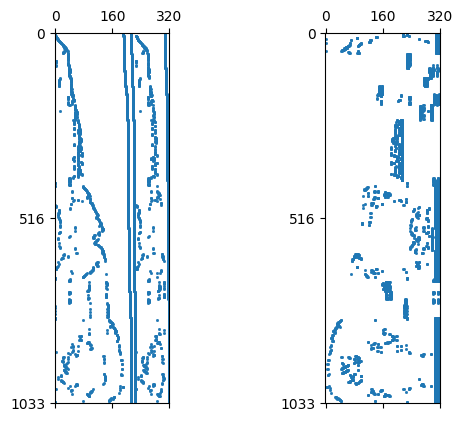

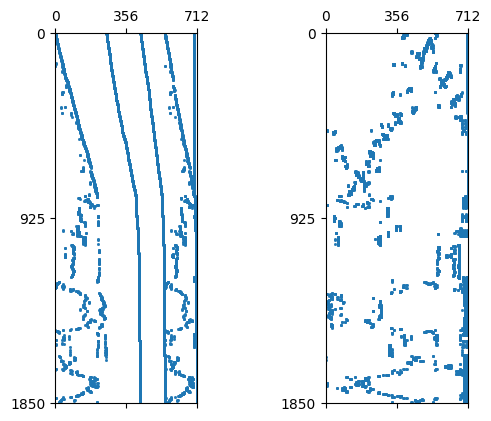

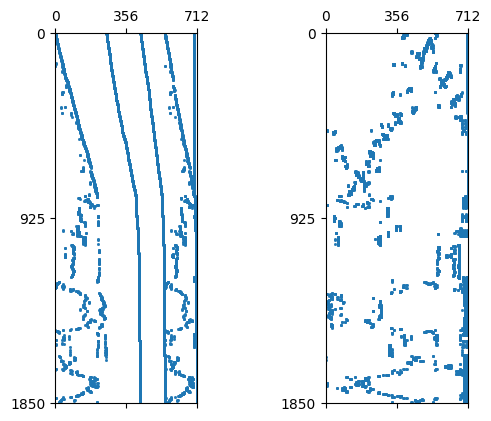

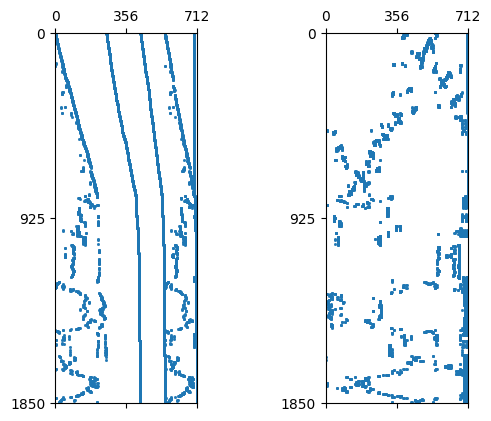

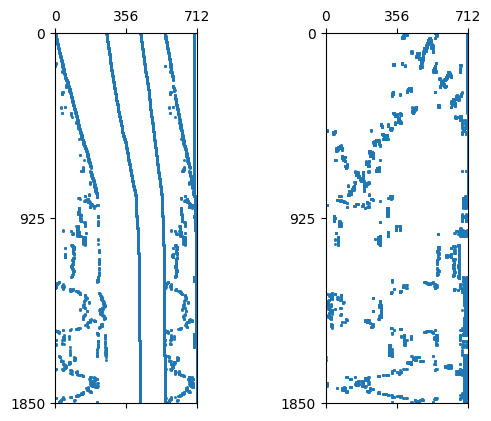

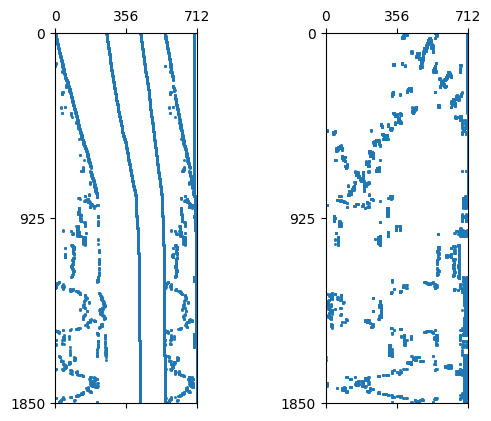

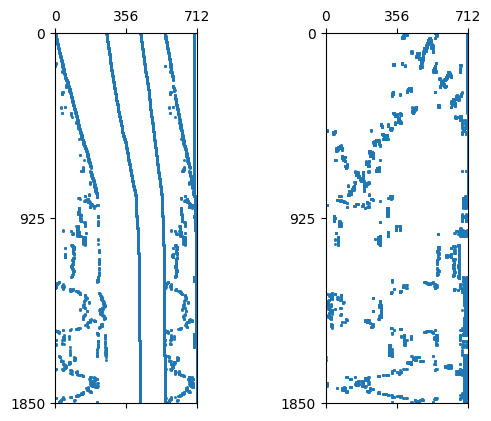

In [4]:
from benchmark import utils_bandwidth_reducing
utils_bandwidth_reducing.test_cholesky_matrix_market()

# Apply Bandwidth reducing permutation to SGK

Creating random matrix with density 0.5


/home/kwu/cupy-playground/intrasm_engine/benchmark/bandwidth_reducing_examples.py:60: CholmodTypeConversionWarning: converting matrix of class coo_matrix to CSC format
  factor = cholesky_AAt(mat_coo, mode=modes[0])
/home/kwu/cupy-playground/intrasm_engine/benchmark/bandwidth_reducing_examples.py:61: CholmodTypeConversionWarning: converting matrix of class coo_matrix to CSC format
  factorT = cholesky_AAt(mat_coo.T, mode=modes[0])


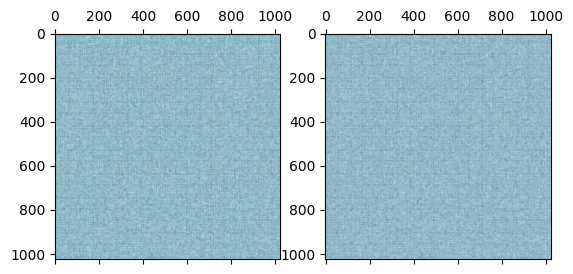

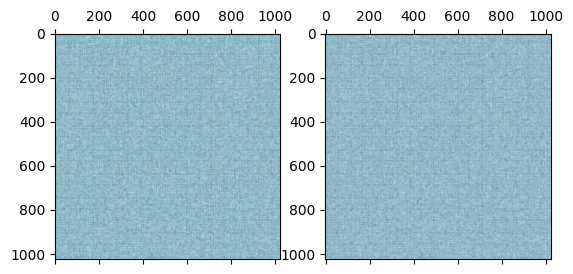

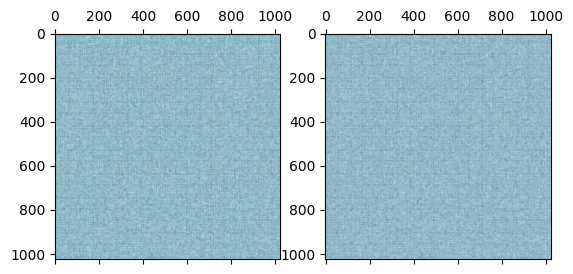

Creating random matrix with density 0.3


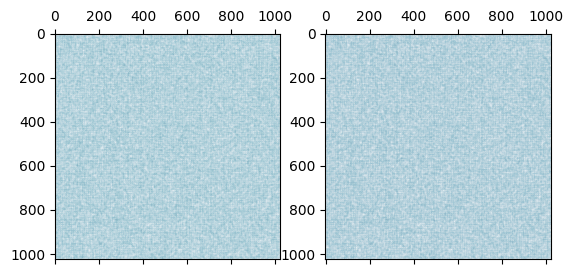

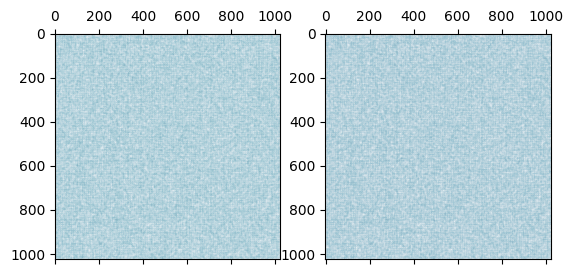

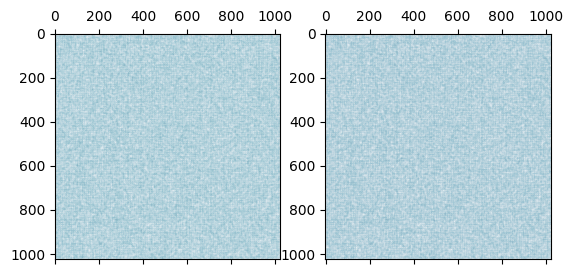

Creating random matrix with density 0.1


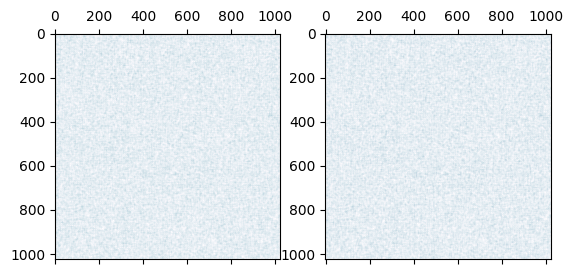

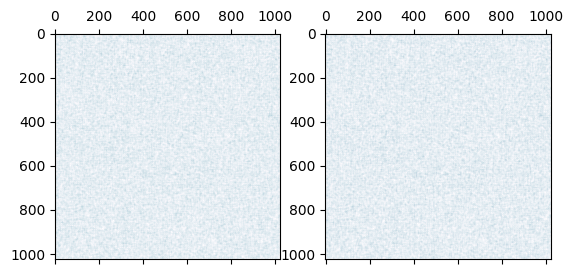

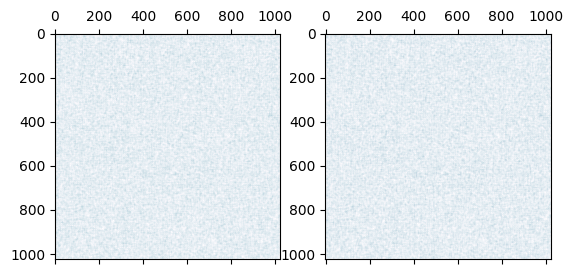

In [5]:
from benchmark import utils_bandwidth_reducing
NUM_REPEATS = 3
MATRIX_WIDTH = 1024
for density in [0.5, 0.3, 0.1]:
    print(f"Creating random matrix with density {density}")
    for idx_repeat in range(NUM_REPEATS):
        # Create random mtx 
        mat = sparse.rand(MATRIX_WIDTH, MATRIX_WIDTH, density=density, random_state=1234) #+ np.eye(MATRIX_WIDTH)
        # mat_rcm = utils_bandwidth_reducing.apply_reverse_chthill_mckee(mat)
        mat_rcm = utils_bandwidth_reducing.apply_cholmod(mat)
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.spy(mat,markersize=0.005)
        # ax1.set_xticks([0, mat.shape[1]/2, mat.shape[1]])
        # ax1.set_yticks([0, mat.shape[0]/2, mat.shape[0]])
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.spy(mat_rcm,markersize=0.005)
        # ax2.set_xticks([0, mat.shape[1]/2, mat.shape[1]])
        # ax2.set_yticks([0, mat.shape[0]/2, mat.shape[0]])
        plt.show()